Łukasz Blachnicki

# Formula 11

In [51]:
from typing import Tuple, List

Point = Tuple[float, float]

points: List[Point] = [
    (1, 10),
    (2, 18),
    (3, 22),
    (4, 27),
    (5, 36),
    (6, 49),
    (7, 56),
    (8, 64),
    (9, 70),
    (10, 78),
]

# returns parameters p0, p1 of a linear function
def least_squares_approximation(points: List[Point]) -> Tuple[float, float]:
    N = sum(p[0] for p in points)
    L = sum(p[1] for p in points)
    N_square_sum = sum(p[0]**2 for p in points)
    N_L_sum = sum(p[0]*p[1] for p in points)

    w = len(points) * N_square_sum - N * N
    w1 = L * N_square_sum - N_L_sum * N
    w2 = len(points) * N_L_sum - N * L

    p0 = w1/w
    p1 = w2/w

    return p1, p0

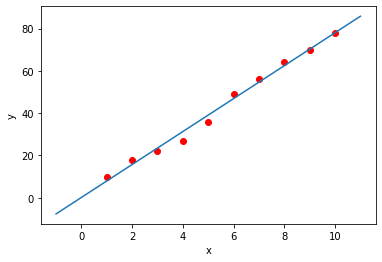

In [52]:
import matplotlib.pyplot as plt
import numpy

known_points: List[Point] = [
    (1, 10),
    (2, 18),
    (3, 22),
    (4, 27),
    (5, 36),
    (6, 49),
    (7, 56),
    (8, 64),
    (9, 70),
    (10, 78)
]

def graph(x: float, a: float, b: float):
    return a * x + b

params = least_squares_approximation(known_points)

x_draw = [(x, graph(x, params[0], params[1])) for x in numpy.linspace(-1.0, 11.0, num=50)]
plt.plot(*zip(*x_draw)) # interpolated curve

plt.scatter(*zip(*known_points), c='red') # original points
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Formula 13

In [60]:
import math

known_points: List[Point] = [
    (1, 0.03),
    (2, 0.3),
    (3, 0.45),
    (4, 0.6),
    (5, 0.7),
    (6, 0.8),
]

# returns parameters a, b of y= a * lnx + b
def ln_least_squares_1(points: List[Point]) -> Tuple[float, float]:
    lnX_sum = sum(math.log(p[0]) for p in points)
    Y_sum = sum(p[1] for p in points)
    YlnX_sum = sum(p[1] * math.log(p[0]) for p in points)
    lnXsquared_sum = sum(math.log(p[0])**2 for p in points)
    n = len(points)

    a = (Y_sum * lnX_sum + n * YlnX_sum) / (lnX_sum * lnX_sum + n * lnXsquared_sum)
    b = (a * lnXsquared_sum - YlnX_sum) / lnX_sum

    return a, b

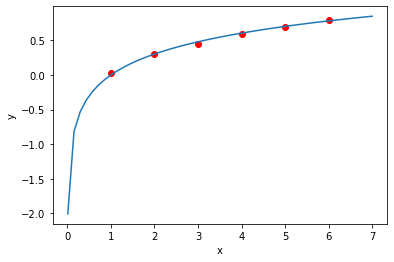

In [61]:
known_points: List[Point] = [
    (1, 0.03),
    (2, 0.3),
    (3, 0.45),
    (4, 0.6),
    (5, 0.7),
    (6, 0.8),
]

def graph(x: float, a: float, b: float):
    return a * math.log(x) + b

params = ln_least_squares_1(known_points)

x_draw = [(x, graph(x, params[0], params[1])) for x in numpy.linspace(0.01, 7.0, num=50)]
plt.plot(*zip(*x_draw)) # interpolated curve

plt.scatter(*zip(*known_points), c='red') # original points
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Formula 14

In [55]:
known_points: List[Point] = [
    (0, 100),
    (60, 90),
    (120, 80),
    (180, 72),
    (240, 65),
    (300, 58),
]

# returns parameters a, b of y= a * exp(bx)
def nonlinear(points: List[Point]) -> Tuple[float, float]:
    n = len(points)
    t_sum = sum(p[0] for p in points)
    Y_sum = sum(math.log(p[1]) for p in points)
    tt_sum = sum(p[0]**2 for p in points)
    tY_sum = sum(p[0]*math.log(p[1]) for p in points)

    A = ((tY_sum * t_sum) - (Y_sum * tt_sum)) / ((t_sum * t_sum) - (n * tt_sum))
    b = (Y_sum - (A * n)) / t_sum
    a = math.exp(A)

    return a, b

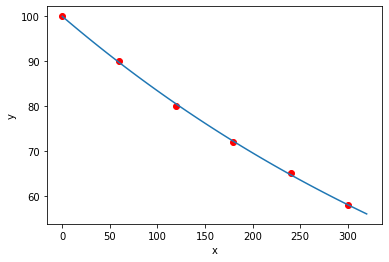

In [56]:
known_points: List[Point] = [
    (0, 100),
    (60, 90),
    (120, 80),
    (180, 72),
    (240, 65),
    (300, 58),
]

def graph(x: float, a: float, b: float):
    return a * math.exp(b * x)

params = nonlinear(known_points)

x_draw = [(x, graph(x, params[0], params[1])) for x in numpy.linspace(0.01, 320, num=50)]
plt.plot(*zip(*x_draw)) # interpolated curve

plt.scatter(*zip(*known_points), c='red') # original points
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [57]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_linear_approximation_points(self):
        known_points: List[Point] = [
            (1, 10),
            (2, 18),
            (3, 22),
            (4, 27),
            (5, 36),
            (6, 49),
            (7, 56),
            (8, 64),
            (9, 70),
            (10, 78),
        ]

        actual = least_squares_approximation(known_points)

        self.assertAlmostEqual(
            actual[0],
            7.794,
            places=3
        )
        self.assertAlmostEqual(
            actual[1],
            0.133,
            places=3
        )

    def test_ln_least_squares_1(self):
        known_points: List[Point] = [
            (1, 0.03),
            (2, 0.3),
            (3, 0.45),
            (4, 0.6),
            (5, 0.7),
            (6, 0.8),
        ]

        actual = ln_least_squares_1(known_points)

        self.assertAlmostEqual(
            actual[0],
            0.436,
            places=3
        )
        self.assertAlmostEqual(
            actual[1],
            0.0016,
            places=3
        )

    def test_nonlinear(self):
        known_points: List[Point] = [
            (0, 100),
            (60, 90),
            (120, 80),
            (180, 72),
            (240, 65),
            (300, 58),
        ]

        actual = nonlinear(known_points)

        self.assertAlmostEqual(
            actual[0],
            99.972,
            places=3
        )
        self.assertAlmostEqual(
            actual[1],
            -0.001807,
            places=3
        )

unittest.main(argv=[''], verbosity=2, exit=False)

test_linear_approximation_points (__main__.TestNotebook) ... ok
test_ln_least_squares_1 (__main__.TestNotebook) ... ok
test_nonlinear (__main__.TestNotebook) ... 

6.579251212010101 2.88 4.094110414826882 9.409906419952225 6


ok

----------------------------------------------------------------------
Ran 3 tests in 0.009s

OK


In [58]:
# jupyter nbconvert --execute --to pdf notebook.ipynb